In [1]:
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import models, dataset, utils
from torchvision.transforms import Compose, Resize, ToPILImage, ToTensor
from torch.utils.data import Dataset, DataLoader
import os
#os.environ["TOKENIZERS_PARALLELISM"] = "false"


/home/lab/anaconda3/envs/SRCAP/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
class AverageMeter(object):
    """
    computes and stores the average and current value
    """

    def __init__(self, start_val=0, start_count=0, start_avg=0, start_sum=0):
        self.reset()
        self.val = start_val
        self.avg = start_avg
        self.sum = start_sum
        self.count = start_count

    def reset(self):
        """
        Initialize 'value', 'sum', 'count', and 'avg' with 0.
        """
        self.val = 0
        self.avg = 0
        self.sum = 0
        self.count = 0

    def update(self, val, num):
        """
        Update 'value', 'sum', 'count', and 'avg'.
        """
        self.val = val
        self.sum += val * num
        self.count += num
        self.avg = self.sum / self.count

loading annotations into memory...
Done (t=0.59s)
creating index...
index created!


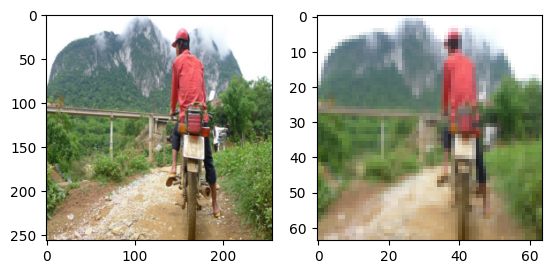

In [3]:
from dataset import train_dataset
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
import dataset
from tqdm import tqdm
from torch.utils.data import Subset

#pylab.rcParams['figure.figsize'] = (8.0, 10.0)

dataDir='..'
dataType='val2017'
COCOdataset = dataset.train_dataset_version2(utils.root, utils.training_dataset_json.format(dataDir,dataType))
train_dataloader = DataLoader(dataset= COCOdataset, batch_size=utils.batch_size, shuffle=True, collate_fn= dataset.collate_fn_version2, num_workers= 15)
img_real, img, anns = COCOdataset[0]
plt.subplot(1,2,1)
plt.imshow(img_real.permute(1,2,0).numpy())
plt.subplot(1,2,2)
plt.imshow(img.permute(1,2,0).numpy())

In [4]:
print(img)

tensor([[[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.6392, 0.6431, 0.6549,  ..., 0.3529, 0.2863, 0.2392],
         [0.6588, 0.6588, 0.7137,  ..., 0.4157, 0.3216, 0.2549],
         [0.7059, 0.6902, 0.7922,  ..., 0.4157, 0.3059, 0.2706]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         ...,
         [0.5451, 0.5451, 0.5608,  ..., 0.3451, 0.2588, 0.2706],
         [0.5608, 0.5608, 0.6235,  ..., 0.4118, 0.3020, 0.2706],
         [0.6000, 0.5961, 0.7176,  ..., 0.4275, 0.3137, 0.2824]],

        [[1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.0000],
         [1.0000, 1.0000, 1.0000,  ..., 1.0000, 1.0000, 1.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


tensor([[[0.9989, 1.0132, 1.0164,  ..., 1.0090, 0.9945, 0.9773],
         [1.0148, 1.0214, 1.0194,  ..., 1.0127, 1.0002, 0.9905],
         [1.0177, 1.0161, 1.0123,  ..., 1.0083, 0.9922, 1.0014],
         ...,
         [0.7206, 0.7236, 0.6956,  ..., 0.2725, 0.2801, 0.2882],
         [0.7035, 0.7081, 0.7000,  ..., 0.2747, 0.2812, 0.2910],
         [0.6812, 0.7015, 0.6934,  ..., 0.2878, 0.2923, 0.2970]],

        [[1.0022, 1.0228, 1.0198,  ..., 1.0019, 0.9881, 0.9757],
         [1.0141, 1.0299, 1.0270,  ..., 1.0051, 1.0062, 0.9879],
         [1.0262, 1.0259, 1.0080,  ..., 1.0158, 1.0111, 1.0013],
         ...,
         [0.6251, 0.6238, 0.5841,  ..., 0.2725, 0.2847, 0.2822],
         [0.6130, 0.6221, 0.6090,  ..., 0.2693, 0.2878, 0.2875],
         [0.6018, 0.6114, 0.6095,  ..., 0.2717, 0.2883, 0.2900]],

        [[0.9868, 1.0041, 1.0130,  ..., 0.9933, 0.9912, 0.9690],
         [1.0077, 1.0185, 1.0326,  ..., 1.0155, 1.0052, 0.9886],
         [1.0053, 1.0118, 1.0134,  ..., 1.0024, 1.0013, 1.

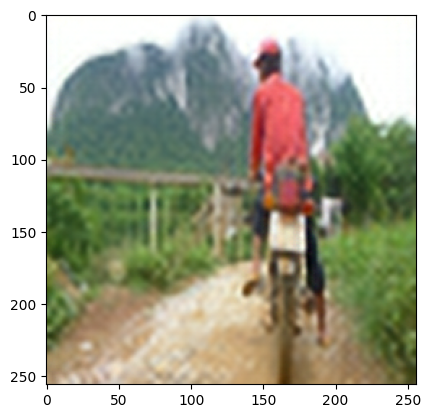

In [5]:
import torch
#SR = models.SRResNet()
SR = torch.load('/ssd1/HyunJun/SRGAN/model/model3.pt')
VisionTransformer = utils.load("model_trained")
#G = models.SRCAP_version2_Generator(SR = SR, VisionTransformer= VisionTransformer).to('cuda').train()
#fake_img, fake_anns = G(img.unsqueeze(0).to('cuda'))
#print("Keys in loaded state_dict:", SR.keys())
#SR.load_state_dict(state_dict)
#SR.eval()
image = SR(img.unsqueeze(0).to('cuda')).to('cuda')
image[0] = image[0]
print(image[0])
print(img_real)
plt.imshow(image[0].permute(1,2,0).cpu().detach().numpy())
print(utils.psnr(image.cpu().detach(), img_real))

In [6]:
#import utils
#VisionTransformer = utils.load("model_trained")

In [7]:
#from PIL import Image
#image = image.cpu().detach().numpy()
#image = np.clip(image, 0, 1)
#pixel_values = dataset.image_preprocess(image)
#print(pixel_values)

In [8]:
#plt.imshow(pixel_values[0].permute(1,2,0))
torch.cuda.empty_cache()


In [9]:
import models, torch
from time import time
from tqdm import tqdm
import os
import warnings

warnings.filterwarnings("ignore", category=UserWarning, module="skimage.feature.texture")
warnings.filterwarnings("ignore", category=UserWarning, message="The attention mask and the pad token id were not set")

os.environ["TOKENIZERS_PARALLELISM"] = "false"

#SR = torch.load('/ssd1/HyunJun/SRGAN/model/model3.pt')
#SR.eval()
#SR.load_state_dict(torch.load('/ssd1/HyunJun/SRGAN/model/model3.pt')['model_state_dict']).to('cuda')
#checkpoint = torch.load('/ssd1/HyunJun/SRGAN/modelmodel3.pt')

#VisionTransformer = utils.load("model_trained")
G = models.SRCAP_version2_Generator().to('cuda').train()
D = models.Discriminator().to('cuda').train()

learning_rates = {
            'generator': utils.generator_learning_rate,
            'discriminator': utils.discriminator_learning_rate,
        }

optimizerG = torch.optim.Adam(G.parameters(), lr = learning_rates['generator'])
optimizerD = torch.optim.Adam(D.parameters(), lr = learning_rates['discriminator'])
lr_scheduler1 = torch.optim.lr_scheduler.StepLR(optimizer   = optimizerG,
                                            step_size = utils.total_iters,
                                            gamma     = utils.gamma,
                                            )
lr_scheduler2 = torch.optim.lr_scheduler.StepLR(optimizer = optimizerD,
                                            step_size = utils.total_iters,
                                            gamma     = utils.gamma
                                            )


for epoch in range(utils.num_epochs):    
    loop_train = tqdm(
                enumerate(train_dataloader, 1),
                total=len(train_dataloader),
                desc="Train",
                position=0,
                leave=True,
            )
    G_train_loss = []
    D_train_loss = []
    loss_avg_train = AverageMeter()
    for idx , (img_real, img, anns) in loop_train:
        with torch.autograd.set_detect_anomaly(True):
            img_real, img, anns = img_real.to('cuda'), img.to('cuda'), anns.to('cuda')

            #Generator
            optimizerG.zero_grad()
            fake_img, fake_anns = G(img, "Generator")
            #real_anns = G.process_and_tokenizer(img_real).to('cuda')
            real_anns = anns
            G_loss = utils.G_loss(fake_anns, real_anns, fake_img, img_real, D(fake_img)).to('cuda')
            G_loss.requires_grad_(True)
            G_loss.backward(retain_graph= True)
            optimizerG.step()
            lr_scheduler1.step()
            G_train_loss.append(G_loss.item())
            
            #Discriminator
            optimizerD.zero_grad()
            fake_img = G(img, "Discriminator")
            discriminated_real_images = D(img_real)
            discriminated_fake_images = D(fake_img.to('cuda'))
            D_loss = utils.GANLoss('vanilla', 'D', 'S')
            D_loss = D_loss.D_loss(discriminated_fake_images, discriminated_real_images)
            D_loss.requires_grad_(True)
            D_loss.backward()
            optimizerD.step()
            lr_scheduler2.step()
            D_train_loss.append(D_loss.item())
            test_psnr = utils.psnr(img_real, fake_img)
            loss_avg_train.update(G_loss.item(), anns.shape[0])
            loop_train.set_description(f"Train - iteration : {epoch}")
            loop_train.set_postfix(
                    G_loss_batch="{:.4f}".format(G_loss.detach().item()),
                    D_loss_batch="{:.4f}".format(D_loss.detach().item()),
                    psnr="{:.4f}".format(test_psnr),
                    refresh=True,                
                )       
    print(f'[{epoch + 1}, {utils.num_epochs:5d}] G_loss : {torch.tensor(G_train_loss).mean() : 3f} D_loss : {torch.tensor(D_train_loss).mean() : 3f}, D(x) : {discriminated_real_images.mean().item() : 3f}, D(G(z)) : {discriminated_fake_images.mean().item() : 3f}')

Train:   0%|          | 0/11829 [00:00<?, ?it/s]/home/lab/anaconda3/envs/SRCAP/lib/python3.12/site-packages/torch/nn/modules/conv.py:456: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return F.conv2d(input, weight, bias, self.stride,
We strongly recommend passing in an `attention_mask` since your input_ids may be padded. See https://huggingface.co/docs/transformers/troubleshooting#incorrect-output-when-padding-tokens-arent-masked.
You may ignore this warning if your `pad_token_id` (50256) is identical to the `bos_token_id` (50256), `eos_token_id` (50256), or the `sep_token_id` (None), and your input is not padded.
/home/lab/anaconda3/envs/SRCAP/lib/python3.12/site-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFina

[1,     2] G_loss :  2.323771 D_loss :  1.366699, D(x) :  0.000353, D(G(z)) :  0.000398



Train - iteration : 1: 100%|██████████| 11829/11829 [3:36:48<00:00,  1.10s/it, D_loss_batch=1.3863, G_loss_batch=2.4576, psnr=24.8402] 

[2,     2] G_loss :  2.325090 D_loss :  1.386286, D(x) :  0.000309, D(G(z)) :  0.000299


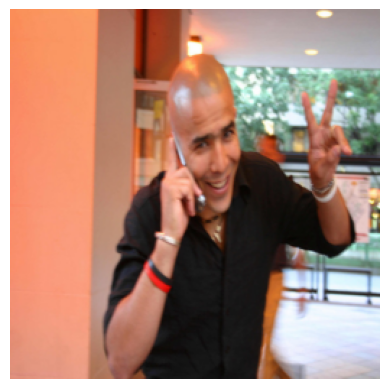

In [10]:
plt.axis('off')
plt.imshow(img_real[2].permute(1,2,0).cpu().detach().numpy())

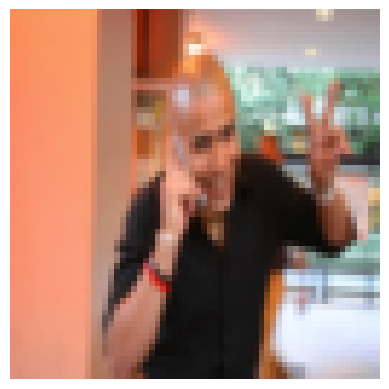

In [11]:
plt.axis('off')
plt.imshow(img[2].permute(1,2,0).cpu().detach().numpy())

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


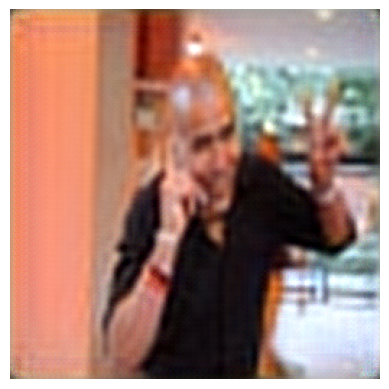

In [12]:
plt.axis('off')
plt.imshow(fake_img[2].permute(1,2,0).cpu().detach().numpy())

In [13]:
print(utils.load("tokenizer").batch_decode(anns[2],  skip_special_tokens=True)) #Original img caption

['A', ' cute', ' bald', ' guy', ' talking', ' on', ' a', ' phone', ' gives', ' the']


In [14]:
real_anns = G.process_and_tokenizer(img_real).to('cuda')
print(utils.load("tokenizer").batch_decode(real_anns[2],  skip_special_tokens=True)) #HR img caption

['a', ' man', ' talking', ' on', ' a', ' cell', ' phone', ' ', '', '']


In [15]:
real_anns = G.process_and_tokenizer(img).to('cuda')
print(utils.load("tokenizer").batch_decode(real_anns[2],  skip_special_tokens=True)) #LR img caption

['a', ' woman', ' talking', ' on', ' a', ' phone', ' while', ' wearing', ' a', ' tie']


In [16]:
print(utils.load("tokenizer").batch_decode(fake_anns[2],  skip_special_tokens=True)) #SR img caption

['a', ' man', ' talking', ' on', ' a', ' cell', ' phone', ' while', ' eating', ' a']


In [17]:
model_name, folder_path = utils.make_dir()
utils.save_model(folder_path, model_name, G)


Folder 'models/testing/LR=8e-05 Upscaling_factor= 4 d_out_mean=True batch_sizet=10 N_ROI=10 Fine_tuning=True/checkpoints' created successfully.
